# This is the final Capstone Project.

## 1. First Step : Import Libraries.

In [1]:
import numpy as np
import csv

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns

from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 


# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt 
%matplotlib inline

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install --channel conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [2]:
import statsmodels.api as sm
!conda install -c anaconda scipy 
from scipy import stats

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mkl-service-2.3.0          |   py36he904b0f_0         208 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    scipy-1.5.0                |   py36h0b6359f_0        18.6 MB  anaconda
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    mkl-2019.4                 |              243       204.1 MB  anaconda
    ------------------------------------------------------------
                                           Total:       226.9 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.20-hecda079_0     conda-forge --> 2020.6.24-0          anaconda
    c


## 2. Second Step : Read Data

* The data was first downloaded into local file. Then the file was loaded into the project. The code below are automatically generated by using the Insert to code function.

In [3]:
# The code was removed by Watson Studio for sharing.

## 3. Pre-processing data

In [4]:
df_data_1.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [4]:
df_data_1.shape

(2369, 17)

## 3.1. Data overview

In [5]:
df_data_1.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

## 3.2 Data selection and Data Reshaping

In [6]:
df_data=df_data_1[['Country', 'Indicator','Unit', 'Value']]

df = pd.pivot_table(df_data, index=['Country'], columns='Indicator',values='Value').reset_index()

In [7]:
df.shape

(41, 25)

In [8]:
missing_data = df.isnull()
result=[]

for column in missing_data.columns.values.tolist():
    result.append(missing_data[column].value_counts().astype(int))


result=pd.concat(result, axis=1)
result.replace(np.nan, 0, inplace=True)
result.rename(index={False: "Number of Value", True: "Number of NaN"})

print (result) 
pd.options.display.float_format = '{:,.4f}'.format

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

       Country  Air pollution  Dwellings without basic facilities  \
False     41.0           41.0                                  38   
True       0.0            0.0                                   3   

       Educational attainment  Employees working very long hours  \
False                      40                                 39   
True                        1                                  2   

       Employment rate  Feeling safe walking alone at night  Homicide rate  \
False             41.0                                 41.0           41.0   
True               0.0                                  0.0            0.0   

       Household net adjusted disposable income  Household net wealth  \
False                                        30                    29   
True                                         11                    12   

       Housing expenditure  Labour market insecurity  Life expectancy  \
False                   39                        34       

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [9]:
df.corr()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Indicator,,,,,,,,,,,,,,,,,,,,,,,,
Air pollution,1.0000,0.2296,0.0122,0.1172,-0.5252,-0.3644,-0.0072,-0.3750,-0.2326,-0.2053,0.2039,-0.2869,-0.5515,0.2836,-0.4486,-0.6794,-0.5973,-0.4158,0.0171,-0.0714,-0.0909,-0.2061,-0.5456,-0.3420
Dwellings without basic facilities,0.2296,1.0000,-0.3271,0.5313,-0.4892,-0.7657,0.7075,-0.4247,-0.3812,-0.3583,-0.0633,-0.8446,-0.5280,0.2928,-0.5928,-0.3822,-0.5684,-0.4790,-0.0014,-0.6006,-0.3182,-0.2317,-0.5859,-0.5004
Educational attainment,0.0122,-0.3271,1.0000,-0.6323,0.5046,0.4495,-0.4906,0.0594,-0.0152,0.0527,-0.2361,0.0864,0.2931,-0.2018,0.2168,0.2754,0.2375,-0.0288,0.2454,0.6279,-0.3361,-0.0865,0.4013,0.2720
Employees working very long hours,0.1172,0.5313,-0.6323,1.0000,-0.3641,-0.4362,0.4418,0.2245,0.4572,-0.0371,-0.0622,-0.2463,-0.1965,-0.0083,-0.1259,-0.2508,-0.2682,0.2509,0.0140,-0.6266,-0.2669,0.0660,-0.3765,-0.2847
Employment rate,-0.5252,-0.4892,0.5046,-0.3641,1.0000,0.6346,-0.3445,0.3649,0.1110,0.2161,-0.6148,0.5221,0.6784,-0.7337,0.4776,0.5521,0.4324,0.0852,0.1471,0.4775,-0.0870,-0.0011,0.7270,0.2391
Feeling safe walking alone at night,-0.3644,-0.7657,0.4495,-0.4362,0.6346,1.0000,-0.7391,0.4241,0.2239,0.2757,-0.2267,0.6908,0.6000,-0.3529,0.6910,0.5601,0.6525,0.3447,0.0413,0.7391,0.1887,0.1529,0.7449,0.4561
Homicide rate,-0.0072,0.7075,-0.4906,0.4418,-0.3445,-0.7391,1.0000,0.0188,0.0045,-0.3655,-0.0377,-0.5848,-0.2594,0.0807,-0.3859,-0.2514,-0.3651,-0.1813,0.0431,-0.6643,-0.3203,-0.1371,-0.4640,-0.5040
Household net adjusted disposable income,-0.3750,-0.4247,0.0594,0.2245,0.3649,0.4241,0.0188,1.0000,0.6966,-0.1042,-0.4263,0.4449,0.6963,-0.4201,0.9110,0.4865,0.7130,0.5138,0.0191,0.0198,0.1842,0.4423,0.4480,-0.0764
Household net wealth,-0.2326,-0.3812,-0.0152,0.4572,0.1110,0.2239,0.0045,0.6966,1.0000,0.1431,-0.2407,0.3967,0.2889,-0.2352,0.6696,0.3437,0.5900,0.3455,0.2506,-0.0017,-0.0981,0.4093,0.0616,-0.2333


In [10]:
corre=df.corr()['Life satisfaction'].sort_values(ascending=False)
corre

Indicator
Life satisfaction                                    1.0000
Personal earnings                                    0.7275
Household net adjusted disposable income             0.6963
Water quality                                        0.6827
Employment rate                                      0.6784
Quality of support network                           0.6677
Self-reported health                                 0.6555
Feeling safe walking alone at night                  0.6000
Rooms per person                                     0.5941
Life expectancy                                      0.5674
Voter turnout                                        0.3689
Years in education                                   0.3255
Educational attainment                               0.2931
Household net wealth                                 0.2889
Housing expenditure                                  0.2868
Time devoted to leisure and personal care            0.2011
Student skills                

In [11]:
print ("Before : ",df.shape)

df=df[df.columns[df.isnull().sum()<6]]
df=df.dropna()

print ("After : " , df.shape)

Before :  (41, 25)
After :  (30, 21)


In [12]:
print(df.dtypes)
print(df.describe(include='all'))

Indicator
Country                                               object
Air pollution                                        float64
Dwellings without basic facilities                   float64
Educational attainment                               float64
Employees working very long hours                    float64
Employment rate                                      float64
Feeling safe walking alone at night                  float64
Homicide rate                                        float64
Housing expenditure                                  float64
Life expectancy                                      float64
Life satisfaction                                    float64
Long-term unemployment rate                          float64
Personal earnings                                    float64
Quality of support network                           float64
Rooms per person                                     float64
Self-reported health                                 float64
Stakeholder en

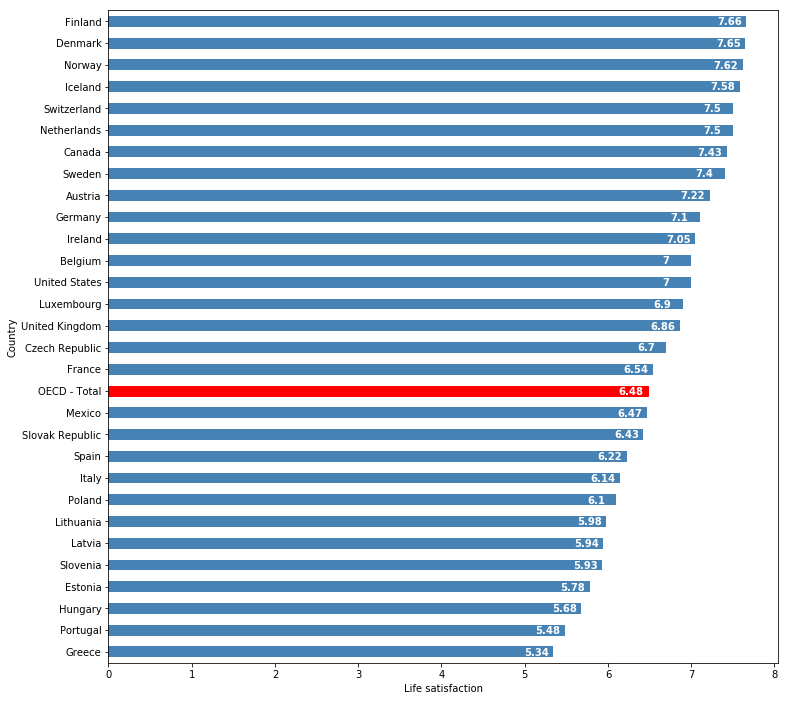

In [13]:
df_satisfaction=df[["Country", "Life satisfaction"]].set_index('Country').sort_values('Life satisfaction')

ax=df_satisfaction.plot(kind='barh', figsize=(12, 12), color='steelblue',legend=None)
ax.set_xlabel('Life satisfaction')
ax.get_children()[12].set_color('r')

rects = ax.patches

# Make some labels.
labels = ['{0:.3g}'.format(value) for index, value in enumerate(df_satisfaction['Life satisfaction'])]

for rect, label in zip(rects, labels):
    ax.text(rect.get_width()-0.35, rect.get_y()+ rect.get_height()/6, label, color="white",fontweight='bold')
   
plt.show()

In [14]:
df.drop(28, inplace=True)
df.reset_index(drop=True, inplace=True)

Text(158.99999999999997, 0.5, '')

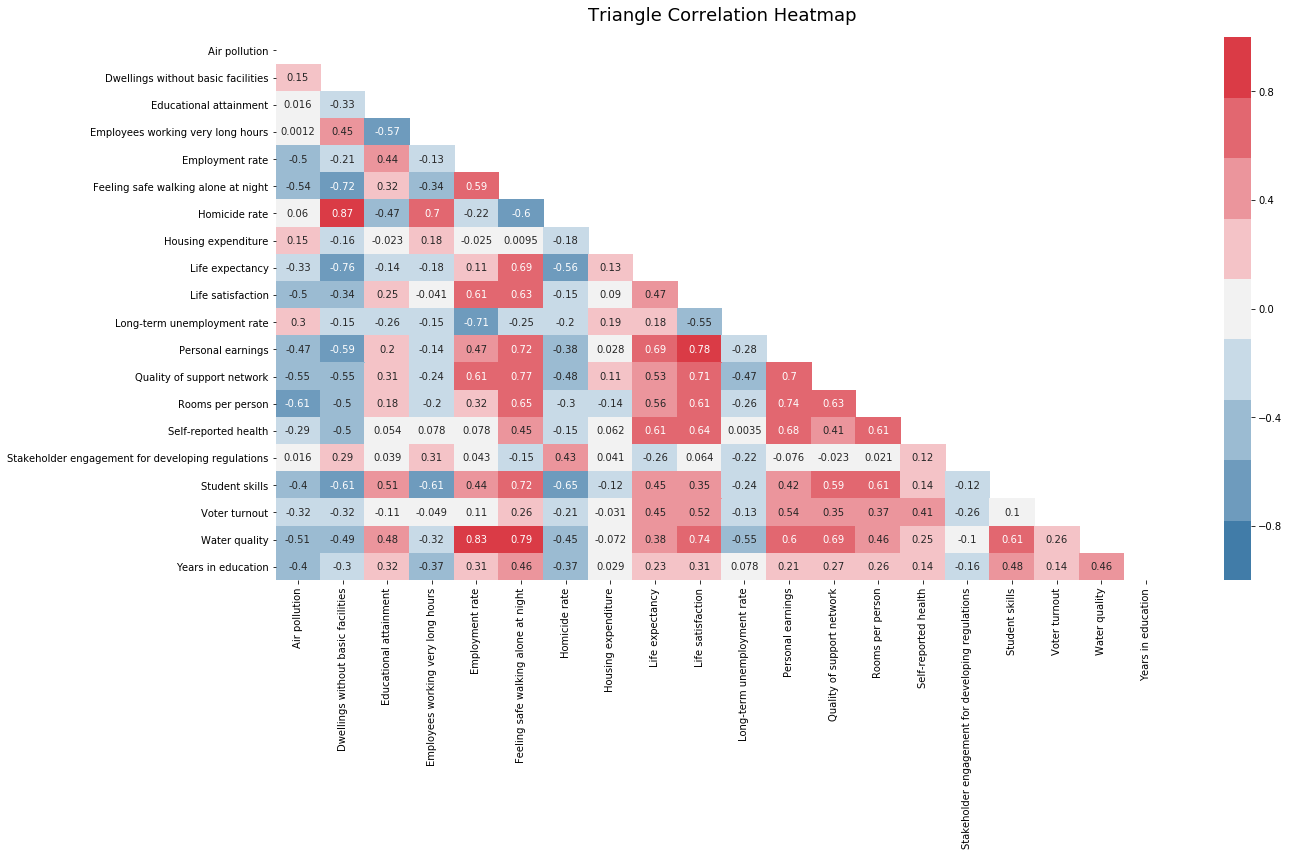

In [16]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(240, 10, n=9))
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
heatmap.set_xlabel(None) 
heatmap.set_ylabel(None)

In [17]:
corre=df.corr()['Life satisfaction'].sort_values(ascending=False)
corre

Indicator
Life satisfaction                                    1.0000
Personal earnings                                    0.7796
Water quality                                        0.7398
Quality of support network                           0.7061
Self-reported health                                 0.6362
Feeling safe walking alone at night                  0.6339
Employment rate                                      0.6123
Rooms per person                                     0.6118
Voter turnout                                        0.5186
Life expectancy                                      0.4685
Student skills                                       0.3491
Years in education                                   0.3142
Educational attainment                               0.2486
Housing expenditure                                  0.0895
Stakeholder engagement for developing regulations    0.0638
Employees working very long hours                   -0.0408
Homicide rate                 

Coefficients:  [[3.99989929e-05]]
Intercept:  [5.08632468]
R-squared:  0.607717908261802


Text(0.7, 0.9, 'y=5.0863 + 0.0000*x')

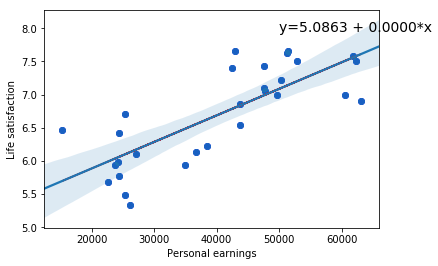

In [37]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(df[['Personal earnings']])
y = np.asanyarray(df[['Life satisfaction']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print ('R-squared: ',regr.score(x,y))


plt.scatter(x, y,  color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.xlabel("Personal earnings")
plt.ylabel("Life satisfaction")

g=sns.regplot(x="Personal earnings", y="Life satisfaction", data=df)
# plt.ylim(0,)

# g = sns.lmplot('Personal earnings','Life satisfaction',df,fit_reg=True,aspect=1.5,ci=None, scatter_kws={"s": 100})
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = str('y=')+str("{:.4f}".format(regr.intercept_[0])) +str(" + ") +str("{:.4f}".format(regr.coef_[0][0]))+ str("*x")
g.text(0.7, 0.9, textstr, transform=g.transAxes, fontsize=14)

In [38]:
x = np.asanyarray(df[['Personal earnings','Water quality','Quality of support network','Feeling safe walking alone at night','Self-reported health','Employment rate','Rooms per person','Voter turnout','Dwellings without basic facilities','Air pollution','Long-term unemployment rate']])
y = np.asanyarray(df[['Life satisfaction']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print ('R-squared: ',regr.score(x,y))

Coefficients:  [[ 6.83477765e-06  5.26836368e-02  4.30909388e-02 -1.38984126e-03
   3.08964159e-02 -2.69335450e-03  1.14192582e-01  1.18583544e-02
   5.65170254e-02  2.34952737e-02 -5.09076792e-03]]
Intercept:  [-5.27558883]
R-squared:  0.9151352070211682


In [39]:
X = df[['Personal earnings','Water quality','Quality of support network','Feeling safe walking alone at night','Self-reported health','Employment rate','Rooms per person','Voter turnout','Dwellings without basic facilities','Air pollution','Long-term unemployment rate']]
y = df[['Life satisfaction']]


X2 = sm.add_constant(X)
reg2 = sm.OLS(y, X2)
result = reg2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Life satisfaction   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     16.67
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           5.48e-07
Time:                        09:29:26   Log-Likelihood:                 4.6611
No. Observations:                  29   AIC:                             14.68
Df Residuals:                      17   BIC:                             31.09
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
X = df[['Personal earnings','Water quality','Self-reported health','Long-term unemployment rate']]
y = df[['Life satisfaction']]


X2 = sm.add_constant(X)
reg2 = sm.OLS(y, X2)
result = reg2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Life satisfaction   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     33.09
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           1.91e-09
Time:                        09:31:34   Log-Likelihood:                -3.9320
No. Observations:                  29   AIC:                             17.86
Df Residuals:                      24   BIC:                             24.70
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## 4. Geospatial Study

## 4.1. Find Country Latitude and Longtitude

In [41]:
df['latitude']=0.00
df['longitude']=0.00

geolocator = Nominatim(user_agent="xxx")

import time

for x in range(0,len(df)):
    location = geolocator.geocode(df['Country'][x])
    time.sleep(2)
    df['latitude'][x]=location.latitude
    df['longitude'][x] = location.longitude

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [276]:
address = 'London'
geolocator = Nominatim(user_agent="xxx")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 51.5073219, -0.1276474.


In [83]:
# create map of New York using latitude and longitude values
map_World = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map
for lat, lng, country in zip(df['latitude'], df['longitude'], df['Country']):
    label = '{}'.format(country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_World)  
    
map_World

In [ ]:
## 4.2.Find the clusters number

In [84]:
Sum_of_squared_distances = []
df_clustering = df.drop('Country', 1)
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(df_clustering)
    Sum_of_squared_distances.append(km.inertia_)

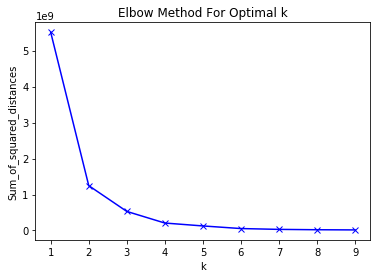

In [85]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## 4.3. Visualisation of clusters

In [277]:
# set number of clusters
kclusters = 2

df_clustering = df.drop('Country', 1)

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10] 

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int32)

In [278]:
# add clustering labels
# df.drop(['Cluster Labels'],axis=1, inplace=True)
#df2=df.insert(0, 'Cluster Labels', kmeans2.labels_, inplace=False)
df2=df.copy()
df4=df.copy()
df2['Cluster Labels']= kmeans2.labels_
df4['Cluster Labels']= kmeans4.labels_

In [279]:
def color_producer(cluster):
    if cluster == 0:
        return 'green'
    elif cluster == 1:
        return 'red'
    elif cluster == 2:
        return 'yellow'
    elif cluster == 3:
        return 'orange'
    else:
        return 'white'

In [280]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df2['latitude'], df2['longitude'], df2['Country'], df2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [281]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=2)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df4['latitude'], df4['longitude'], df4['Country'], df4['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4.4. Getting venues by Foursquare

In [282]:
CLIENT_ID = '1SAFVQXFCYAMFGJAA21O2OQPOG23JUD2Q4NMA243JSWCWZRQ' # your Foursquare ID
CLIENT_SECRET = 'QNKNLYK4GSFLFPFYDCTKONV2M4EYFSJ3P4GGYAJ0UNDYGF54' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1SAFVQXFCYAMFGJAA21O2OQPOG23JUD2Q4NMA243JSWCWZRQ
CLIENT_SECRET:QNKNLYK4GSFLFPFYDCTKONV2M4EYFSJ3P4GGYAJ0UNDYGF54


In [283]:
LIMIT = 500 
radius = 50000

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Country', 
                  'Country Latitude', 
                  'Country Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [284]:
world_venues = getNearbyVenues(names=df['Country'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

In [285]:
print(world_venues.shape)

(2118, 7)


In [199]:
world_venues.groupby('Country').count()

,Country Latitude,Country Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Country,,,,,,
Austria,100,100,100,100,100,100
Belgium,100,100,100,100,100,100
Czech Republic,100,100,100,100,100,100
Denmark,100,100,100,100,100,100
Estonia,72,72,72,72,72,72
Finland,19,19,19,19,19,19
France,42,42,42,42,42,42
Germany,100,100,100,100,100,100
Greece,100,100,100,100,100,100


In [200]:
print('There are {} uniques categories.'.format(len(world_venues['Venue Category'].unique())))

There are 270 uniques categories.


## 4.5. Country Venues

In [286]:
# one hot encoding
world_onehot = pd.get_dummies(world_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
world_onehot['Country'] = world_venues['Country'] 

# move neighborhood column to the first column
fixed_columns = [world_onehot.columns[-1]] + list(world_onehot.columns[:-1])
world_onehot = world_onehot[fixed_columns]

world_grouped = world_onehot.groupby('Country').mean().reset_index()
world_grouped.head()

,Country,Advertising Agency,Agriturismo,Airport,American Restaurant,Apres Ski Bar,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bakery,Bar,Baseball Stadium,Basketball Stadium,Bath House,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boarding House,Bookstore,Border Crossing,Botanical Garden,Boutique,Brasserie,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal,Canal Lock,Candy Store,Castle,Caucasian Restaurant,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Coworking Space,Creperie,Cupcake Shop,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Spot,Dog Run,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hockey Arena,Hostel,Hot Spring,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Lake,Lighthouse,Liquor Store,Lounge,Marijuana Dispensary,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monastery,Monument / Landmark,Motel,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,National Park,Nature Preserve,Neighborhood,Nightclub,Observatory,Office,Opera House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoor Event Space,Outdoors & Recreation,Ouzeri,Paella Restaurant,Paintball Field,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Rafting,Record Shop,Recreation Center,Reservoir,Resort,Rest Area,Restaurant,River,Rock Club,Rugby Stadium,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Chairlift,Ski Chalet,Ski Lodge,Slovak Restaurant,Snack Place,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stables,Stadium,State / Provincial Park,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Town,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Trattoria/Osteria,Truck Stop,Turkish Home Cooking Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Village,Water Park,Waterfall,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo
0,Austria,0.0000,0.0000,0.0000,0.0100,0.0800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400,0.0000,0.0000,0.0100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100,0.0000,0.0000,0.0000,0.0000,0.0

In [287]:
num_top_venues = 10

for hood in world_grouped['Country']:
    print("----"+hood+"----")
    temp = world_grouped[world_grouped['Country'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Austria----
                 venue   freq
0             Ski Area 0.2300
1                Hotel 0.1100
2        Apres Ski Bar 0.0800
3           Restaurant 0.0800
4             Mountain 0.0600
5  Austrian Restaurant 0.0400
6           Water Park 0.0300
7                Trail 0.0300
8           Ski Chalet 0.0300
9            Ski Lodge 0.0300


----Belgium----
                venue   freq
0                Park 0.0800
1         Coffee Shop 0.0600
2      Ice Cream Shop 0.0500
3   French Restaurant 0.0400
4       Historic Site 0.0400
5              Bakery 0.0400
6              Forest 0.0300
7  Italian Restaurant 0.0300
8                 Bar 0.0300
9          Restaurant 0.0300


----Czech Republic----
              venue   freq
0              Café 0.1400
1        Restaurant 0.0900
2    Ice Cream Shop 0.0600
3  Czech Restaurant 0.0500
4            Castle 0.0400
5     Historic Site 0.0400
6               Pub 0.0400
7              Park 0.0400
8           Brewery 0.0300
9    Scenic Lookout 0.

In [288]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Country']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
world_venues_sorted = pd.DataFrame(columns=columns)
world_venues_sorted['Country'] = world_grouped['Country']

for ind in np.arange(world_grouped.shape[0]):
    world_venues_sorted.iloc[ind, 1:] = return_most_common_venues(world_grouped.iloc[ind, :], num_top_venues)

world_venues_sorted.head()

,Country,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Austria,Ski Area,Hotel,Apres Ski Bar,Restaurant,Mountain,Austrian Restaurant,Ski Chalet,Ski Lodge,Water Park,Gastropub
1,Belgium,Park,Coffee Shop,Ice Cream Shop,French Restaurant,Historic Site,Bakery,Forest,Italian Restaurant,Bar,Restaurant
2,Czech Republic,Café,Restaurant,Ice Cream Shop,Czech Restaurant,Park,Historic Site,Pub,Castle,Scenic Lookout,Brewery
3,Denmark,Bar,Café,Beach,Hotel,Music Venue,Bakery,Coffee Shop,Restaurant,Park,Sushi Restaurant
4,Estonia,Trail,Café,Restaurant,Convenience Store,Pub,Scenic Lookout,Supermarket,Grocery Store,Food & Drink Shop,Concert Hall


## 4.6. Find number of Clustering by venues

In [289]:
Sum_of_squared_distances = []
world_grouped_clustering = world_grouped.drop('Country', 1)

K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(world_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

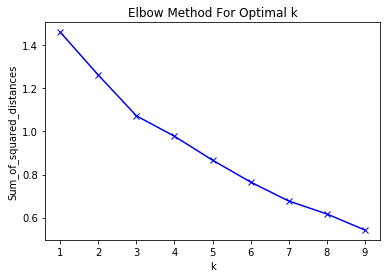

In [290]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## 4.7. Country Clustering by venues

In [294]:
# set number of clusters
kclusters = 2

world_grouped_clustering = world_grouped.drop('Country', 1)

# run k-means clustering
kmeansw2 = KMeans(n_clusters=kclusters, random_state=0).fit(world_grouped_clustering)
kmeansw3 = KMeans(n_clusters=3, random_state=0).fit(world_grouped_clustering)
kmeansw4 = KMeans(n_clusters=4, random_state=0).fit(world_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeansw2.labels_[0:10] 
kmeansw3.labels_[0:10] 

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int32)

In [295]:
#country_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#world_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

world_venues_sorted2=world_venues_sorted.copy()
world_venues_sorted3=world_venues_sorted.copy()
world_venues_sorted4=world_venues_sorted.copy()
world_venues_sorted2['Cluster Labels']= kmeansw2.labels_
world_venues_sorted3['Cluster Labels']= kmeansw3.labels_
world_venues_sorted4['Cluster Labels']= kmeansw4.labels_

world_grouped_merged = df[['Country','latitude','longitude']]
world_grouped_merged2 = df[['Country','latitude','longitude']]
world_grouped_merged3 = df[['Country','latitude','longitude']]
world_grouped_merged4 = df[['Country','latitude','longitude']]

#world_grouped_merged = world_grouped_merged.join(world_venues_sorted.set_index('Country'), on='Country')
world_grouped_merged2 = world_grouped_merged2.join(world_venues_sorted2.set_index('Country'), on='Country')
world_grouped_merged3 = world_grouped_merged3.join(world_venues_sorted3.set_index('Country'), on='Country')
world_grouped_merged4 = world_grouped_merged4.join(world_venues_sorted4.set_index('Country'), on='Country')

In [296]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(world_grouped_merged2['latitude'], world_grouped_merged2['longitude'], world_grouped_merged2['Country'], world_grouped_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [297]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=2)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(world_grouped_merged4['latitude'], world_grouped_merged4['longitude'], world_grouped_merged4['Country'], world_grouped_merged4['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [270]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=2)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(world_grouped_merged3['latitude'], world_grouped_merged3['longitude'], world_grouped_merged3['Country'], world_grouped_merged3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [274]:
print(world_grouped_merged2.Country[world_grouped_merged2['Cluster Labels'] == 0])
print(world_grouped_merged2.Country[world_grouped_merged2['Cluster Labels'] == 1])

print(world_grouped_merged3.Country[world_grouped_merged3['Cluster Labels'] == 0])
print(world_grouped_merged3.Country[world_grouped_merged3['Cluster Labels'] == 1])
print(world_grouped_merged3.Country[world_grouped_merged3['Cluster Labels'] == 2])

print(world_grouped_merged4.Country[world_grouped_merged4['Cluster Labels'] == 0])
print(world_grouped_merged4.Country[world_grouped_merged4['Cluster Labels'] == 1])
print(world_grouped_merged4.Country[world_grouped_merged4['Cluster Labels'] == 2])
print(world_grouped_merged4.Country[world_grouped_merged4['Cluster Labels'] == 3])


6     Finland
7      France
19     Norway
Name: Country, dtype: object
0             Austria
1             Belgium
3      Czech Republic
4             Denmark
5             Estonia
8             Germany
9              Greece
10            Hungary
11            Iceland
12            Ireland
13              Italy
14             Latvia
15          Lithuania
16         Luxembourg
17             Mexico
18        Netherlands
20             Poland
21           Portugal
22    Slovak Republic
23           Slovenia
24              Spain
25             Sweden
26        Switzerland
27     United Kingdom
28      United States
Name: Country, dtype: object
6    Finland
7     France
Name: Country, dtype: object
0             Austria
1             Belgium
3      Czech Republic
4             Denmark
5             Estonia
8             Germany
9              Greece
10            Hungary
11            Iceland
12            Ireland
13              Italy
14             Latvia
15          Lithuania
16       

In [275]:
print(df2.Country[df2['Cluster Labels'] == 0])
print(df2.Country[df2['Cluster Labels'] == 1])

print(df3.Country[df3['Cluster Labels'] == 0])
print(df3.Country[df3['Cluster Labels'] == 1])
print(df3.Country[df3['Cluster Labels'] == 2])

print(df4.Country[df4['Cluster Labels'] == 0])
print(df4.Country[df4['Cluster Labels'] == 1])
print(df4.Country[df4['Cluster Labels'] == 2])
print(df4.Country[df4['Cluster Labels'] == 3])

3      Czech Republic
5             Estonia
9              Greece
10            Hungary
13              Italy
14             Latvia
15          Lithuania
17             Mexico
20             Poland
21           Portugal
22    Slovak Republic
23           Slovenia
24              Spain
Name: Country, dtype: object
0            Austria
1            Belgium
2             Canada
4            Denmark
6            Finland
7             France
8            Germany
11           Iceland
12           Ireland
16        Luxembourg
18       Netherlands
19            Norway
25            Sweden
26       Switzerland
27    United Kingdom
28     United States
Name: Country, dtype: object
0            Austria
1            Belgium
2             Canada
4            Denmark
6            Finland
7             France
8            Germany
12           Ireland
13             Italy
18       Netherlands
19            Norway
24             Spain
25            Sweden
27    United Kingdom
Name: Country, dtype: obje

In [211]:
world_grouped_merged.loc[world_grouped_merged['Cluster Labels'] == 0, world_grouped_merged.columns[[0] + list(range(4, world_grouped_merged.shape[1]))]]

,Country,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Belgium,Park,Coffee Shop,Ice Cream Shop,French Restaurant,Historic Site,Bakery,Forest,Italian Restaurant,Bar,Restaurant
3,Czech Republic,Café,Restaurant,Ice Cream Shop,Czech Restaurant,Park,Historic Site,Pub,Castle,Scenic Lookout,Brewery
4,Denmark,Bar,Café,Beach,Hotel,Music Venue,Bakery,Coffee Shop,Restaurant,Park,Sushi Restaurant
5,Estonia,Trail,Café,Restaurant,Convenience Store,Pub,Scenic Lookout,Supermarket,Grocery Store,Food & Drink Shop,Concert Hall
8,Germany,Café,Hotel,Supermarket,Park,German Restaurant,Plaza,Italian Restaurant,History Museum,Ice Cream Shop,Trattoria/Osteria
9,Greece,Café,Taverna,Greek Restaurant,Bar,Lounge,Gym / Fitness Center,Park,Plaza,Bed & Breakfast,Hotel
10,Hungary,Coffee Shop,Hungarian Restaurant,Hotel,Restaurant,Bakery,Park,Pub,Greek Restaurant,Dessert Shop,Soup Place
11,Iceland,Forest,Airport,Campground,Bar,Hotel,Hostel,Greek Restaurant,Zoo,Fast Food Restaurant,Falafel Restaurant
12,Ireland,Café,Hotel,Supermarket,Pub,Coffee Shop,Steakhouse,Restaurant,Historic Site,Castle,French Restaurant
13,Italy,Italian Restaurant,Plaza,Hotel,Historic Site,Pizza Place,Park,Trattoria/Osteria,Winery,Dessert Shop,Ice Cream Shop


In [212]:
world_grouped_merged.loc[world_grouped_merged['Cluster Labels'] == 1, world_grouped_merged.columns[[0] + list(range(4, world_grouped_merged.shape[1]))]]

,Country,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Finland,Supermarket,Grocery Store,Restaurant,Café,Liquor Store,Historic Site,Pizza Place,Train Station,Farm,Entertainment Service
7,France,Supermarket,Train Station,Fast Food Restaurant,Hotel,Steakhouse,Grocery Store,French Restaurant,Café,Shopping Mall,Rest Area
25,Sweden,Grocery Store,Café,Hotel,Supermarket,Fast Food Restaurant,Food Court,Theme Park,Scandinavian Restaurant,Museum,Train Station


In [213]:
world_grouped_merged.loc[world_grouped_merged['Cluster Labels'] == 2, world_grouped_merged.columns[[0] + list(range(4, world_grouped_merged.shape[1]))]]

,Country,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Norway,Hotel,Toy / Game Store,Cafeteria,Train Station,Museum,Harbor / Marina,Fast Food Restaurant,Event Space,Falafel Restaurant,Farm


In [214]:
world_grouped_merged.loc[world_grouped_merged['Cluster Labels'] == 3, world_grouped_merged.columns[[0] + list(range(4, world_grouped_merged.shape[1]))]]

,Country,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Austria,Ski Area,Hotel,Apres Ski Bar,Restaurant,Mountain,Austrian Restaurant,Ski Chalet,Ski Lodge,Water Park,Gastropub
20,Poland,Restaurant,Lake,Supermarket,Fast Food Restaurant,Hotel,Gas Station,Pub,Spa,Farm,Shopping Mall
22,Slovak Republic,Hotel,Restaurant,Eastern European Restaurant,Slovak Restaurant,Mountain,Ski Area,Café,Ski Chairlift,Tea Room,Castle
24,Spain,Restaurant,Plaza,Hotel,Spanish Restaurant,Park,Food,Gaming Cafe,Tapas Restaurant,Gas Station,Church
26,Switzerland,Hotel,Mountain,Scenic Lookout,Swiss Restaurant,Train Station,Café,Ski Area,Bridge,Chocolate Shop,Supermarket
